![Google Play Store](https://hindisahayta.in/wp-content/uploads/2018/09/Google-Play-Store-Ki-ID-Kaise-Banaye.png)

# Финальный проект школы DA
## Обзоры на приложения в Google Play Store

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from matplotlib import colors
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Google-Playstore.csv')
df = df[['Category','App Name','Rating','Maximum Installs','Free','Price','Editors Choice','App Id']]
df.head()

,Category,App Name,Rating,Maximum Installs,Free,Price,Editors Choice,App Id
0,Adventure,Gakondo,0.0,15,True,0.0,False,com.ishakwe.gakondo
1,Tools,Ampere Battery Info,4.4,7662,True,0.0,False,com.webserveis.batteryinfo
2,Productivity,Vibook,0.0,58,True,0.0,False,com.doantiepvien.crm
3,Communication,Smart City Trichy Public Service Vehicles 17UC...,5.0,19,True,0.0,False,cst.stJoseph.ug17ucs548
4,Tools,GROW.me,0.0,478,True,0.0,False,com.horodyski.grower


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2312944 entries, 0 to 2312943
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Category          object 
 1   App Name          object 
 2   Rating            float64
 3   Maximum Installs  int64  
 4   Free              bool   
 5   Price             float64
 6   Editors Choice    bool   
 7   App Id            object 
dtypes: bool(2), float64(2), int64(1), object(3)
memory usage: 110.3+ MB


In [4]:
# проверка пропусков
(df.isnull().sum()/df.shape[0])*100

Category            0.000000
App Name            0.000086
Rating              0.989345
Maximum Installs    0.000000
Free                0.000000
Price               0.000000
Editors Choice      0.000000
App Id              0.000000
dtype: float64

In [5]:
# проверка данных рейтинга на корректность
df[df['Rating']>5]

,Category,App Name,Rating,Maximum Installs,Free,Price,Editors Choice,App Id


In [6]:
# подбор данных mean,median взамен Nan
df_r = df[pd.notnull(df['Rating'])]
mean=np.mean(df_r['Rating'])
median=np.median(df_r['Rating'])

print(mean,median)

2.2031515317710064 2.9


In [7]:
# замена Nan на среднее
df['Rating'].fillna(mean,inplace=True)

In [8]:
# удаление дубликатов и пропусков
df.drop_duplicates(inplace=True) 
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Category            0
App Name            0
Rating              0
Maximum Installs    0
Free                0
Price               0
Editors Choice      0
App Id              0
dtype: int64

In [10]:
df['App Name'] = df['App Name'].apply(lambda x: str(x).replace('شرطة الأطفال - مكالمة وهمية','Kids Police - Fake Call') if 'شرطة الأطفال - مكالمة وهمية' in str(x) else x)

In [11]:
print('Количество категорий приложений :',df['Category'].nunique())
print('Количество приложений :',df['App Name'].count())

Количество категорий приложений : 48
Количество приложений : 2312942


### Вывод : 
#### Проведенный анализ Google Play Store  на 15.06.2021 показал ,что магазин включает в себя около 2 млн 312 тыс  различных приложений. 
#### Данные приложения деляться на 48 категорий , которые включают в себя такие сферы как бизнес,музыку,видео,игры,спорт,образование итд.

# ------------------------------------------------------------------------------------------------------------

### 1. Самые популярные приложения по категориям

In [12]:
df_popular = (df.groupby(['Category','App Name'])['Maximum Installs'].agg(['max']).sort_values(by='max', ascending=False).reset_index().drop_duplicates('Category', keep='first'))
df_popular['Category/App Name'] = df_popular.agg('{0[Category]} / {0[App Name]}'.format, axis=1)
df_popular

,Category,App Name,max,Category/App Name
0,Tools,Google Play services,12057627016,Tools / Google Play services
1,Video Players & Editors,YouTube,9766230924,Video Players & Editors / YouTube
3,Travel & Local,Google Maps - Navigate & Explore,9141671889,Travel & Local / Google Maps - Navigate & Explore
5,Communication,Google Chrome: Fast & Secure,8925640788,Communication / Google Chrome: Fast & Secure
8,Productivity,Google Drive,7028265259,Productivity / Google Drive
9,Social,Facebook,6782619635,Social / Facebook
12,Photography,Google Photos,5754179589,Photography / Google Photos
16,Entertainment,Google Play Games,4605543029,Entertainment / Google Play Games
22,Books & Reference,"Google Play Books - Ebooks, Audiobooks, and Co...",3202676731,Books & Reference / Google Play Books - Ebooks...
23,News & Magazines,Google News - Top world & local news headlines,2961820154,News & Magazines / Google News - Top world & l...


Text(0, 0.5, 'Названия категории / приложения')

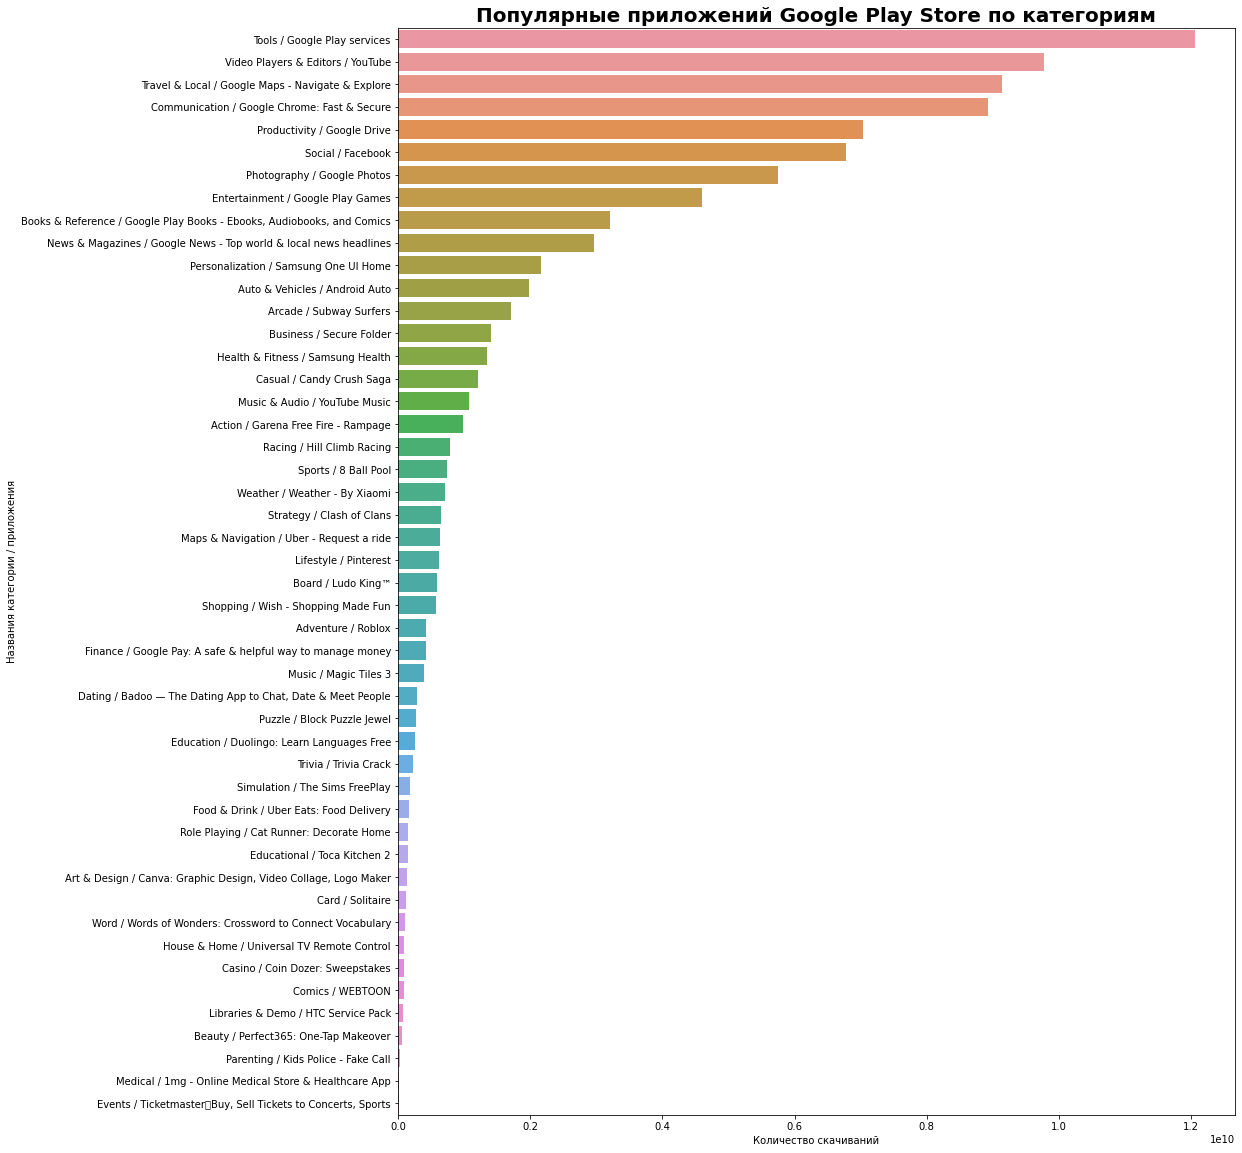

In [13]:
plt.figure(figsize=(15,20))
sns.barplot(data=df_popular,x='max',y='Category/App Name')
plt.title('Популярные приложений Google Play Store по категориям',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Количество скачиваний')
plt.ylabel('Названия категории / приложения')

### Вывод : 
#### На данном графике вы видите список самых популярных приложений по категориям
#### Первое место занимает приложение Google Play services категории Tools(Инструменты) ,на него приходится более 12,05 млрд скачиваний.
#### Второй по популярности YouTube категории Video Players & Editors(Видеоплееры и редакторы) ,на него приходится более 9,77 млрд скачиваний.
#### На третьем местe по популярности  Google Maps - Navigate & Explore категории Tools(Путешествия и окрестности) ,его скачали более 9,14 млрд скачиваний.

### 1.1. Рейтинг самые популярные приложения 

<AxesSubplot:title={'center':'Рейтинг популярных приложений установленных более 1 млрд.раз'}, xlabel='Рейтинг'>

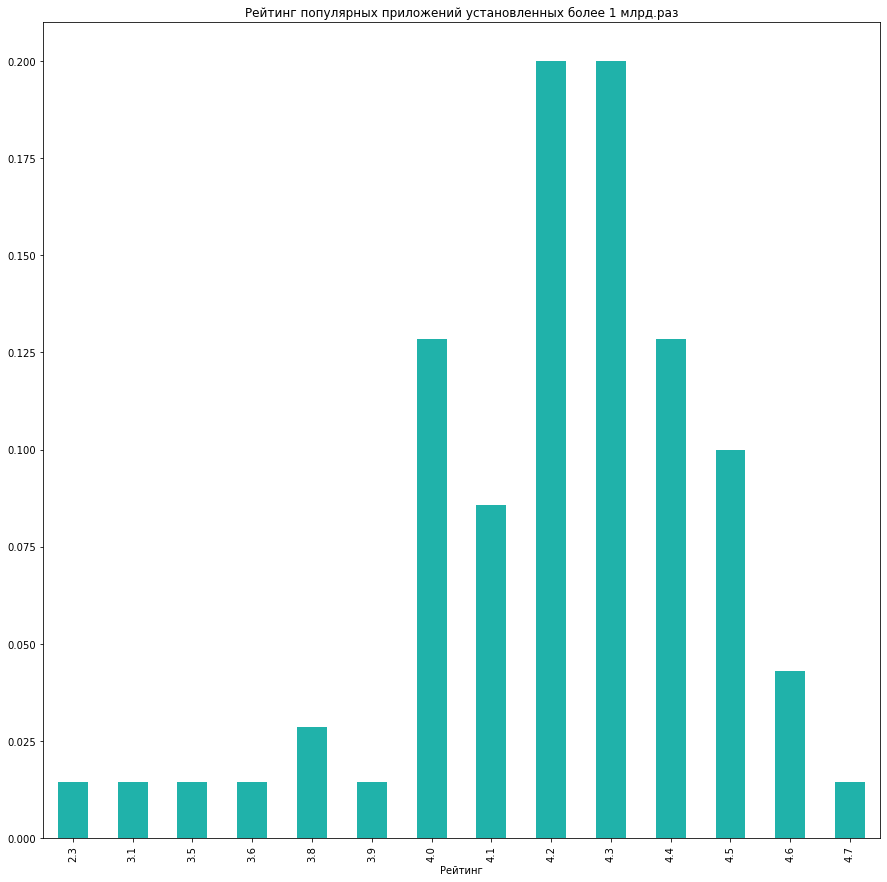

In [14]:
billion = df[df['Maximum Installs'] >= 1000000000]
plt.figure(figsize=(15,15))
plt.xlabel('Рейтинг')
billion['Rating'].value_counts(normalize=True).sort_index().plot(kind="bar", title='Рейтинг популярных приложений установленных более 1 млрд.раз',color= 'lightseagreen')

In [15]:
print('Средний рейтинг приложений скаченных более 1 миллиада раз :',billion.Rating.mean())
print('Средний рейтинг всех приложений :',df.Rating.mean())

Средний рейтинг приложений скаченных более 1 миллиада раз : 4.1885714285714295
Средний рейтинг всех приложений : 2.2031505400919964


### Вывод : 
#### Если сузить список приложений, которые установили более 1 миллиарда раз, средний рейтинг этих популярных приложений составит около 4.2 , что на 47% больше чем рейтинг всех приложений в Google Play Store - 2.2.Это говорит о прямопропорциональной зависимости количества скачиваний приложений и рейтинга.

# ------------------------------------------------------------------------------------------------------------

### 2. Самые дорогие приложения (и категории)

#### 2.1  Платные и бесплатные приложения

[]

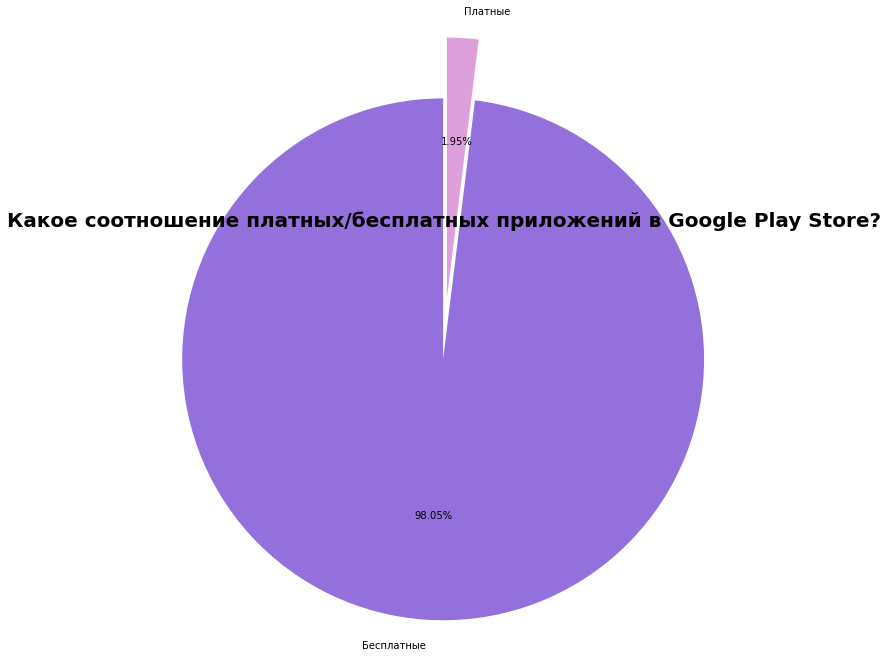

In [16]:
plt.pie(df.Free.value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['mediumpurple','plum'],labels=['Бесплатные','Платные'],
        startangle=90)
plt.title('Какое соотношение платных/бесплатных приложений в Google Play Store?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [17]:
price = df[df['Price']>0]
print('Приложение с самой высокой ценой :',price.Price.max())
print('Приложение с самой низкой ценой :',price.Price.min())
print('Средняя стоимость на приложения :',price.Price.mean())

Приложение с самой высокой ценой : 400.0
Приложение с самой низкой ценой : 0.194824
Средняя стоимость на приложения : 5.32766023352284


#### 2.2  Самые дорогие  приложения

In [18]:
app_expensive = df.groupby(['App Name'])['Price'].max().sort_values(ascending  = False).reset_index()
app_expensive = app_expensive.head(30)
app_expensive.head(10)

,App Name,Price
0,MESH Connect,400.00
1,Why Not,399.99
2,TEST EGY,399.99
3,Taxes,399.99
4,Challenge Impossible Ball for you,399.99
5,My Money,399.99
6,Luxsure,399.99
7,Baby Nightmares,399.99
8,Nu Media TV Live,399.99
9,Success,399.99


Text(0, 0.5, 'Приложение')

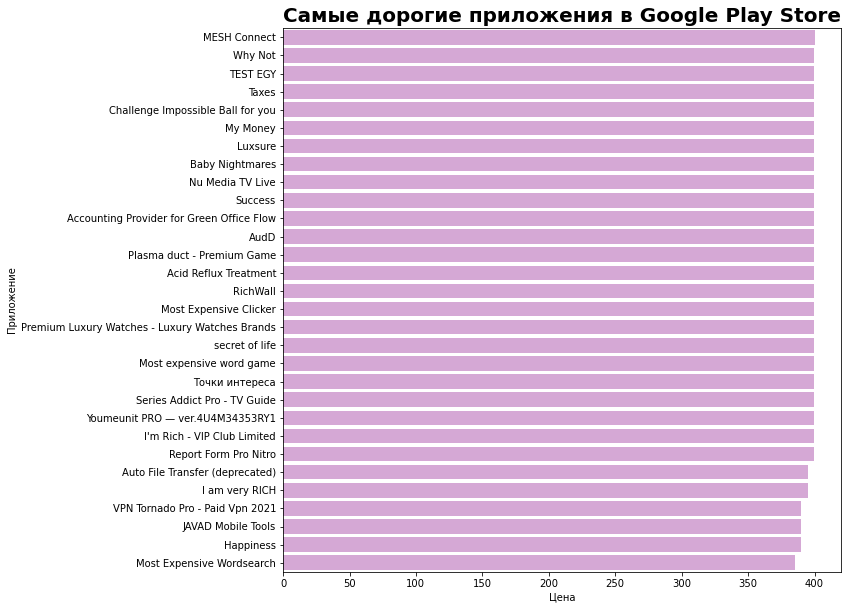

In [19]:
plt.figure(figsize=(10,10))
sns.barplot(x = app_expensive['Price'], y = app_expensive['App Name'],color = 'plum')
plt.title('Самые дорогие приложения в Google Play Store',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Цена')
plt.ylabel('Приложение')

#### 2.3  Самые дорогие  категории

In [20]:
category_expensive = df.groupby(['Category'])['Price'].max().sort_values(ascending  = False).reset_index()
category_expensive.head(5)

,Category,Price
0,Productivity,400.00
1,Board,399.99
2,Business,399.99
3,Entertainment,399.99
4,Arcade,399.99


Text(0, 0.5, 'Категории')

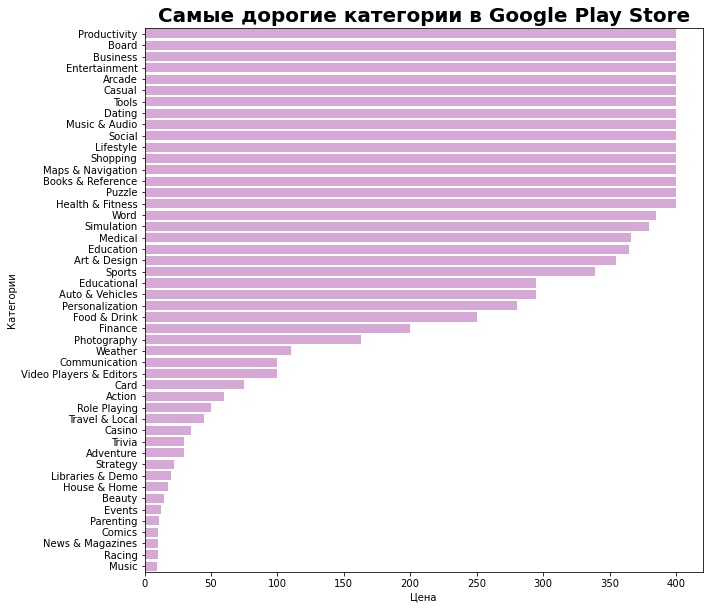

In [21]:
plt.figure(figsize=(10,10))
sns.barplot(x = category_expensive['Price'], y = category_expensive['Category'],color = 'plum')
plt.title('Самые дорогие категории в Google Play Store',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Цена')
plt.ylabel('Категории')

Text(0, 0.5, 'Рейтинг')

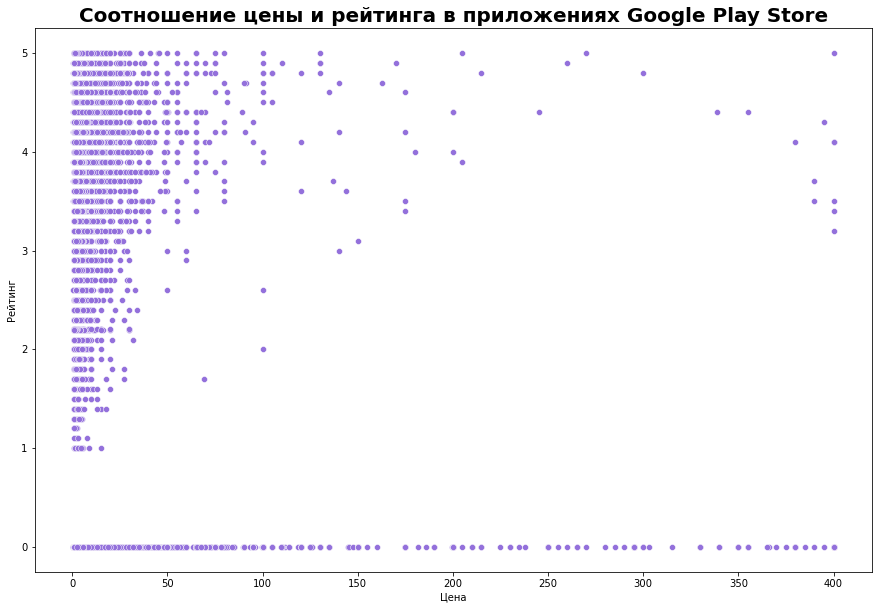

In [22]:
paid_apps = df[df.Price > 0]
plt.figure(figsize = (15,10))
sns.scatterplot(x = 'Price',y = 'Rating',data = paid_apps,color = 'mediumpurple')
plt.title('Соотношение цены и рейтинга в приложениях Google Play Store',fontdict={'size':20,'weight':'bold'})
plt.xlabel('Цена')
plt.ylabel('Рейтинг')

### Вывод : 
#### Приложения в Google Play Store делятся на платные и бесплатные . Доля бесплатных приложений составляет - 98,05%,платных -1,95%.
#### Самое дорогое приложение в Google Play Store называется MESH Connect,категории Productivity (Продуктивность) его стоимость составляет 400 долларов.Приложение с самой низкой ценой  стоит  0.19 долларов.Средняя цена приложений составляет 5,32 доллара.
#### Самый высокий рейтинг имеют приложения стоимость которых составляет от 0 до 50 долларов.Так же хочется отметить ,что большая часть самых дорогие приложения имеют рейтинг от 3,5 до 5 ,что говорит о том что покупатели данных приложений остались довольными покупкой

# ------------------------------------------------------------------------------------------------------------

### 3. Категории содержащие самое большое количество приложений без отзывов

#### 3.1  Соотношение приложений с отзывами /без отзывов

[]

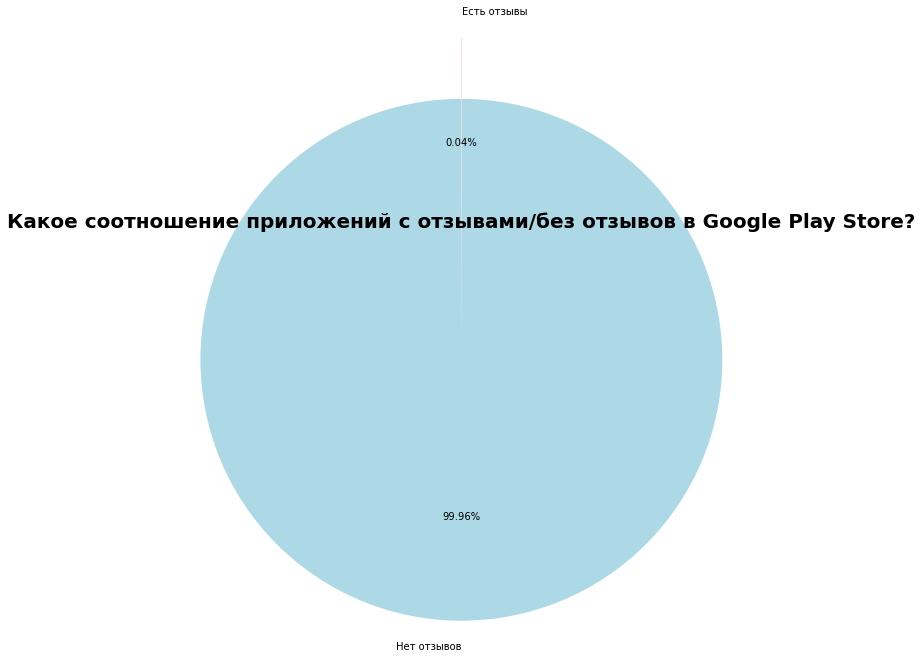

In [23]:
plt.pie(df['Editors Choice'].value_counts(),radius=3,autopct='%0.2f%%',explode=[0.2,0.5],colors=['lightblue','pink'],labels=['Нет отзывов','Есть отзывы'],
        startangle=90)
plt.title('Какое соотношение приложений с отзывами/без отзывов в Google Play Store?',fontdict={'size':20,'weight':'bold'})
plt.plot()

In [24]:
category = df[df['Editors Choice'] == False]
category_choice = category.groupby(['Category'])['Editors Choice'].count().sort_values(ascending  =False).reset_index()
category_choice.head(10)

,Category,Editors Choice
0,Education,241050
1,Music & Audio,154894
2,Tools,143987
3,Business,143761
4,Entertainment,138259
5,Lifestyle,118316
6,Books & Reference,116720
7,Personalization,89210
8,Health & Fitness,83469
9,Productivity,79683


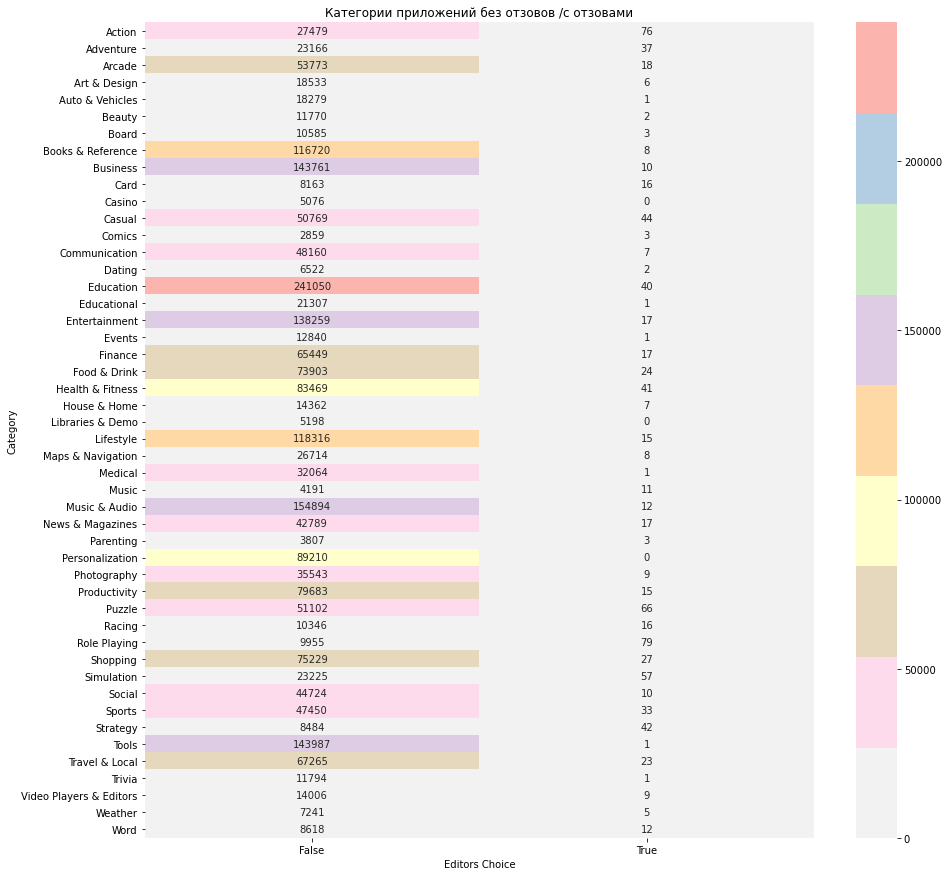

In [25]:
plt.figure(figsize=(15,15))
plt.title("Категории приложений без отзовов /с отзовами")
sns.heatmap(pd.crosstab(df['Category'], df["Editors Choice"]),annot=True,fmt='g', cmap="Pastel1_r")
plt.show()

### Вывод : 
#### В Google Play Store приложения деляться на имеющие отзовы- 0,04% и не имеющие отзовы-99,96%.
#### На первом месте категория содержащая самое большое количество приложений без отзовов  Education (Образование)	у нее - 241002 приложений без отзовов , и только - 40 с отзывами. На втором месте Music & Audio(Музыка и Аудио)- 154866 - 12 .На третьем месте Tools (Инструменты)	143830 - 1 соответственно .
#### Данная статистика показывает, что клиенты Google Play Store не любят оставлять отзывы установленных приложений

# Sentiment Analysis  Google Play Store (на основе всех отзовов)

In [26]:
# !pip install wordcloud
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KatenokDav\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [89]:
review_df = pd.read_csv("reviews.csv")
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12495 entries, 0 to 12494
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              12495 non-null  object
 1   userName              12495 non-null  object
 2   userImage             12495 non-null  object
 3   content               12495 non-null  object
 4   score                 12495 non-null  int64 
 5   thumbsUpCount         12495 non-null  int64 
 6   reviewCreatedVersion  10333 non-null  object
 7   at                    12495 non-null  object
 8   replyContent          5818 non-null   object
 9   repliedAt             5818 non-null   object
 10  sortOrder             12495 non-null  object
 11  appId                 12495 non-null  object
dtypes: int64(2), object(10)
memory usage: 1.1+ MB


In [91]:
PlayStore_cp = df.copy()
merged_df = pd.merge(PlayStore_cp, review_df, how='right', left_on='App Id', right_on='appId')
merged_df = merged_df.dropna(subset=['content'])
merged_df.info()
wc = WordCloud(background_color="white", max_words=2000, colormap="viridis")
stop = stopwords.words('english')
stop = stop + ['open','installs','installs','are','all','app' ,'ap', 'app', 'apps', 'application', 'browser', 'website', 'websites', 'chrome', 'click', 'web', 'ip', 'address',
'files', 'android', 'browse', 'service', 'use', 'one', 'download', 'email', 'launcher','dtype','anymore','updates','begging','month','nobody','content','refund','replying','oct'
' version','5000w','indian','Name','rupees','per','bett','1']

merged_df['content'] = merged_df['content'].apply(lambda x: " ".join(x for x in str(x.lower()).split(' ') if x not in stop))
merged_df.content = merged_df.content.apply(lambda x: x if 'content' not in x.split(' ') else np.nan)
merged_df.dropna(subset=['content'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12495 entries, 0 to 12494
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Category              12495 non-null  object 
 1   App Name              12495 non-null  object 
 2   Rating                12495 non-null  float64
 3   Maximum Installs      12495 non-null  int64  
 4   Free                  12495 non-null  bool   
 5   Price                 12495 non-null  float64
 6   Editors Choice        12495 non-null  bool   
 7   App Id                12495 non-null  object 
 8   reviewId              12495 non-null  object 
 9   userName              12495 non-null  object 
 10  userImage             12495 non-null  object 
 11  content               12495 non-null  object 
 12  score                 12495 non-null  int64  
 13  thumbsUpCount         12495 non-null  int64  
 14  reviewCreatedVersion  10333 non-null  object 
 15  at                 

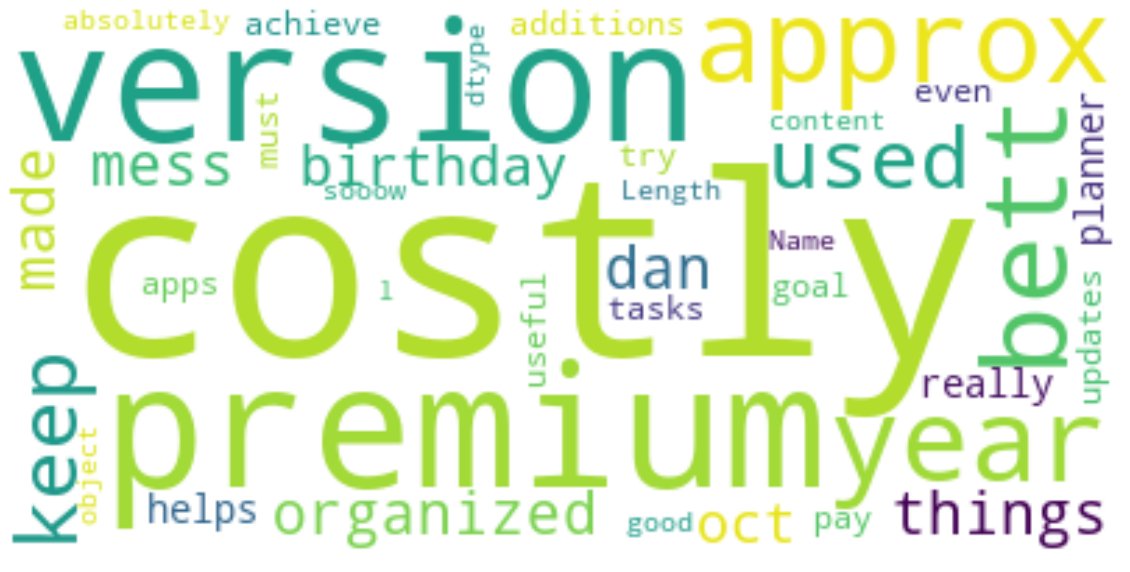

In [87]:
free = merged_df.loc[merged_df.Category != '']['content'].apply(lambda x: '' if x=='nan' else x)
merged_df.content
wc.generate(''.join(str(free)))
plt.figure(figsize=(20, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Вывод : 
#### В Google Play Store отзовы деляться на позитивные ,негативные и нейтральные .